In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
men_vs_women = pd.read_csv('../data/obesity-in-men-vs-obesity-in-women.csv')

In [5]:
men_vs_women

,Entity,Code,Year,"Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%) - Sex:Male","Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%) - Sex:Female",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,Asia
1,Afghanistan,AFG,1975,0.2,0.8,NaN
2,Afghanistan,AFG,1976,0.2,0.8,NaN
3,Afghanistan,AFG,1977,0.2,0.9,NaN
4,Afghanistan,AFG,1978,0.2,0.9,NaN
...,...,...,...,...,...,...
8573,Zimbabwe,ZWE,2013,4.2,23.9,NaN
8574,Zimbabwe,ZWE,2014,4.4,24.4,NaN
8575,Zimbabwe,ZWE,2015,4.5,24.8,Africa
8576,Zimbabwe,ZWE,2016,4.7,25.3,NaN


In [6]:
men_vs_women.isna().sum()

Entity                                                                                                                 0
Code                                                                                                                 420
Year                                                                                                                   0
Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%) - Sex:Male        94
Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%) - Sex:Female      94
Continent                                                                                                           8293
dtype: int64

### Renaming columns to make them more understandable.

In [7]:
men_vs_women.rename(columns={'Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%) - Sex:Male': '% of men w/BMI of 30kg/m2 or higher','Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%) - Sex:Female':'% of women w/BMI of 30kg/m2 or higher'}, inplace=True)

In [8]:
men_vs_women

,Entity,Code,Year,% of men w/BMI of 30kg/m2 or higher,% of women w/BMI of 30kg/m2 or higher,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,Asia
1,Afghanistan,AFG,1975,0.2,0.8,NaN
2,Afghanistan,AFG,1976,0.2,0.8,NaN
3,Afghanistan,AFG,1977,0.2,0.9,NaN
4,Afghanistan,AFG,1978,0.2,0.9,NaN
...,...,...,...,...,...,...
8573,Zimbabwe,ZWE,2013,4.2,23.9,NaN
8574,Zimbabwe,ZWE,2014,4.4,24.4,NaN
8575,Zimbabwe,ZWE,2015,4.5,24.8,Africa
8576,Zimbabwe,ZWE,2016,4.7,25.3,NaN


### Dropped the "Continent" column because it was almost all NaN's.

In [9]:
men_vs_women

,Entity,Code,Year,% of men w/BMI of 30kg/m2 or higher,% of women w/BMI of 30kg/m2 or higher,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,Asia
1,Afghanistan,AFG,1975,0.2,0.8,NaN
2,Afghanistan,AFG,1976,0.2,0.8,NaN
3,Afghanistan,AFG,1977,0.2,0.9,NaN
4,Afghanistan,AFG,1978,0.2,0.9,NaN
...,...,...,...,...,...,...
8573,Zimbabwe,ZWE,2013,4.2,23.9,NaN
8574,Zimbabwe,ZWE,2014,4.4,24.4,NaN
8575,Zimbabwe,ZWE,2015,4.5,24.8,Africa
8576,Zimbabwe,ZWE,2016,4.7,25.3,NaN


### Reduced the data to the most recent 30 year term to get a clearer window.

In [10]:
m_vs_w_25=men_vs_women[men_vs_women['Year']>= 1986]
m_vs_w_25

,Entity,Code,Year,% of men w/BMI of 30kg/m2 or higher,% of women w/BMI of 30kg/m2 or higher,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,Asia
12,Afghanistan,AFG,1986,0.4,1.5,NaN
13,Afghanistan,AFG,1987,0.5,1.6,NaN
14,Afghanistan,AFG,1988,0.5,1.7,NaN
15,Afghanistan,AFG,1989,0.6,1.8,NaN
...,...,...,...,...,...,...
8573,Zimbabwe,ZWE,2013,4.2,23.9,NaN
8574,Zimbabwe,ZWE,2014,4.4,24.4,NaN
8575,Zimbabwe,ZWE,2015,4.5,24.8,Africa
8576,Zimbabwe,ZWE,2016,4.7,25.3,NaN


### Average women BMI by Entity (Descending)

In [11]:
avg_women_by_country=men_vs_women.groupby('Entity')['% of women w/BMI of 30kg/m2 or higher'].mean().reset_index()
#avg_women_by_country.sort_values(ascending=False)
avg_women_by_country=pd.DataFrame(avg_women_by_country)
avg_women_by_country

,Entity,% of women w/BMI of 30kg/m2 or higher
0,Abkhazia,NaN
1,Afghanistan,3.190476
2,Africa,8.304762
3,Akrotiri and Dhekelia,NaN
4,Albania,13.959524
5,Algeria,21.838095
6,American Samoa,NaN
7,Americas,20.685714
8,Andorra,22.254762
9,Angola,5.230952


In [43]:
avg_women_by_country=avg_women_by_country.dropna()
avg_women_by_country

,Entity,% of women w/BMI of 30kg/m2 or higher
1,Afghanistan,3.190476
2,Africa,8.304762
4,Albania,13.959524
5,Algeria,21.838095
7,Americas,20.685714
8,Andorra,22.254762
9,Angola,5.230952
12,Antigua and Barbuda,16.571429
13,Argentina,20.600000
14,Armenia,15.792857


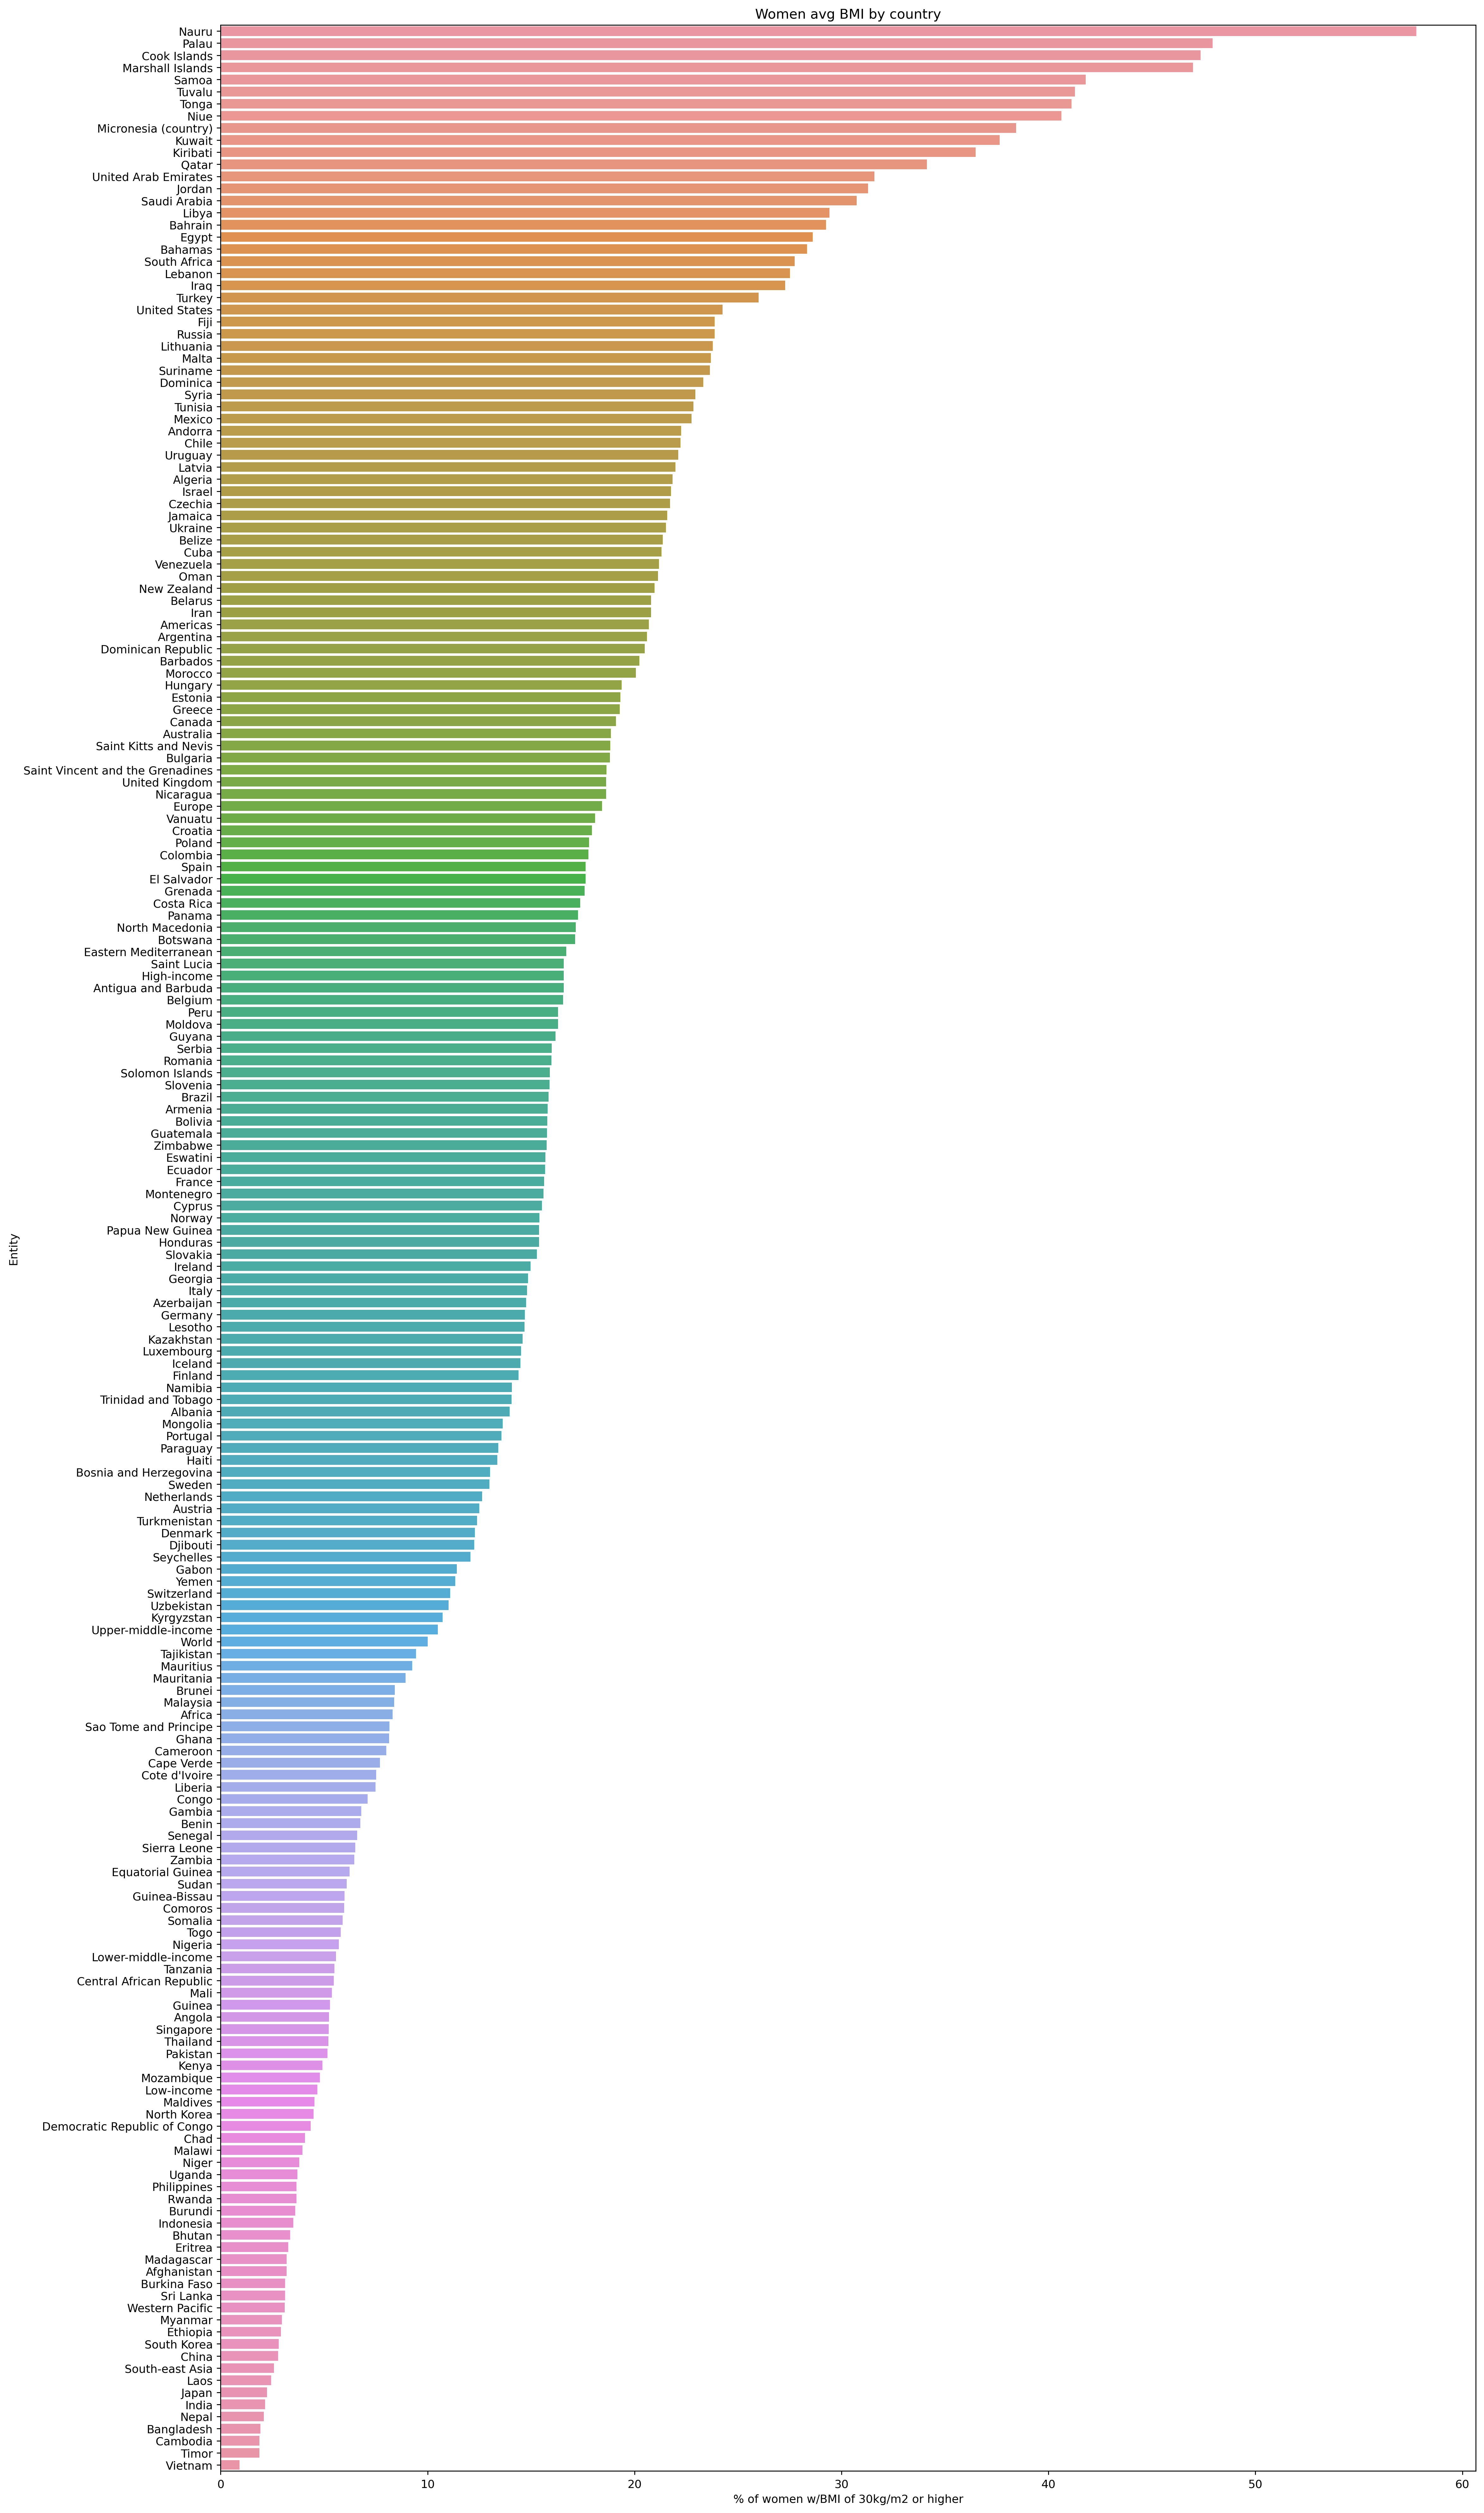

In [44]:
df=avg_women_by_country.sort_values('% of women w/BMI of 30kg/m2 or higher', ascending=False)
figure(num=None, figsize=(20,40),dpi=256, facecolor='w', edgecolor='r')
plt.title("Women avg BMI by country")
sns.barplot(data=df,x='% of women w/BMI of 30kg/m2 or higher', y='Entity')
plt.show()

### Average men BMI by Entity (Descending)

In [12]:
avg_men_by_country=men_vs_women.groupby('Entity')['% of men w/BMI of 30kg/m2 or higher'].mean().reset_index()
#avg_men_by_country.sort_values(ascending=False)
avg_men_by_country=pd.DataFrame(avg_men_by_country)
avg_men_by_country.columns=['Entity', '% of men w/BMI of 30kg/m2 or higher']
avg_men_by_country

,Entity,% of men w/BMI of 30kg/m2 or higher
0,Abkhazia,NaN
1,Afghanistan,1.145238
2,Africa,2.345238
3,Akrotiri and Dhekelia,NaN
4,Albania,10.959524
5,Algeria,9.388095
6,American Samoa,NaN
7,Americas,15.652381
8,Andorra,18.552381
9,Angola,1.402381


In [13]:
avg_men_by_country=avg_men_by_country.dropna()
avg_men_by_country

,Entity,% of men w/BMI of 30kg/m2 or higher
1,Afghanistan,1.145238
2,Africa,2.345238
4,Albania,10.959524
5,Algeria,9.388095
7,Americas,15.652381
8,Andorra,18.552381
9,Angola,1.402381
12,Antigua and Barbuda,6.135714
13,Argentina,17.380952
14,Armenia,10.011905


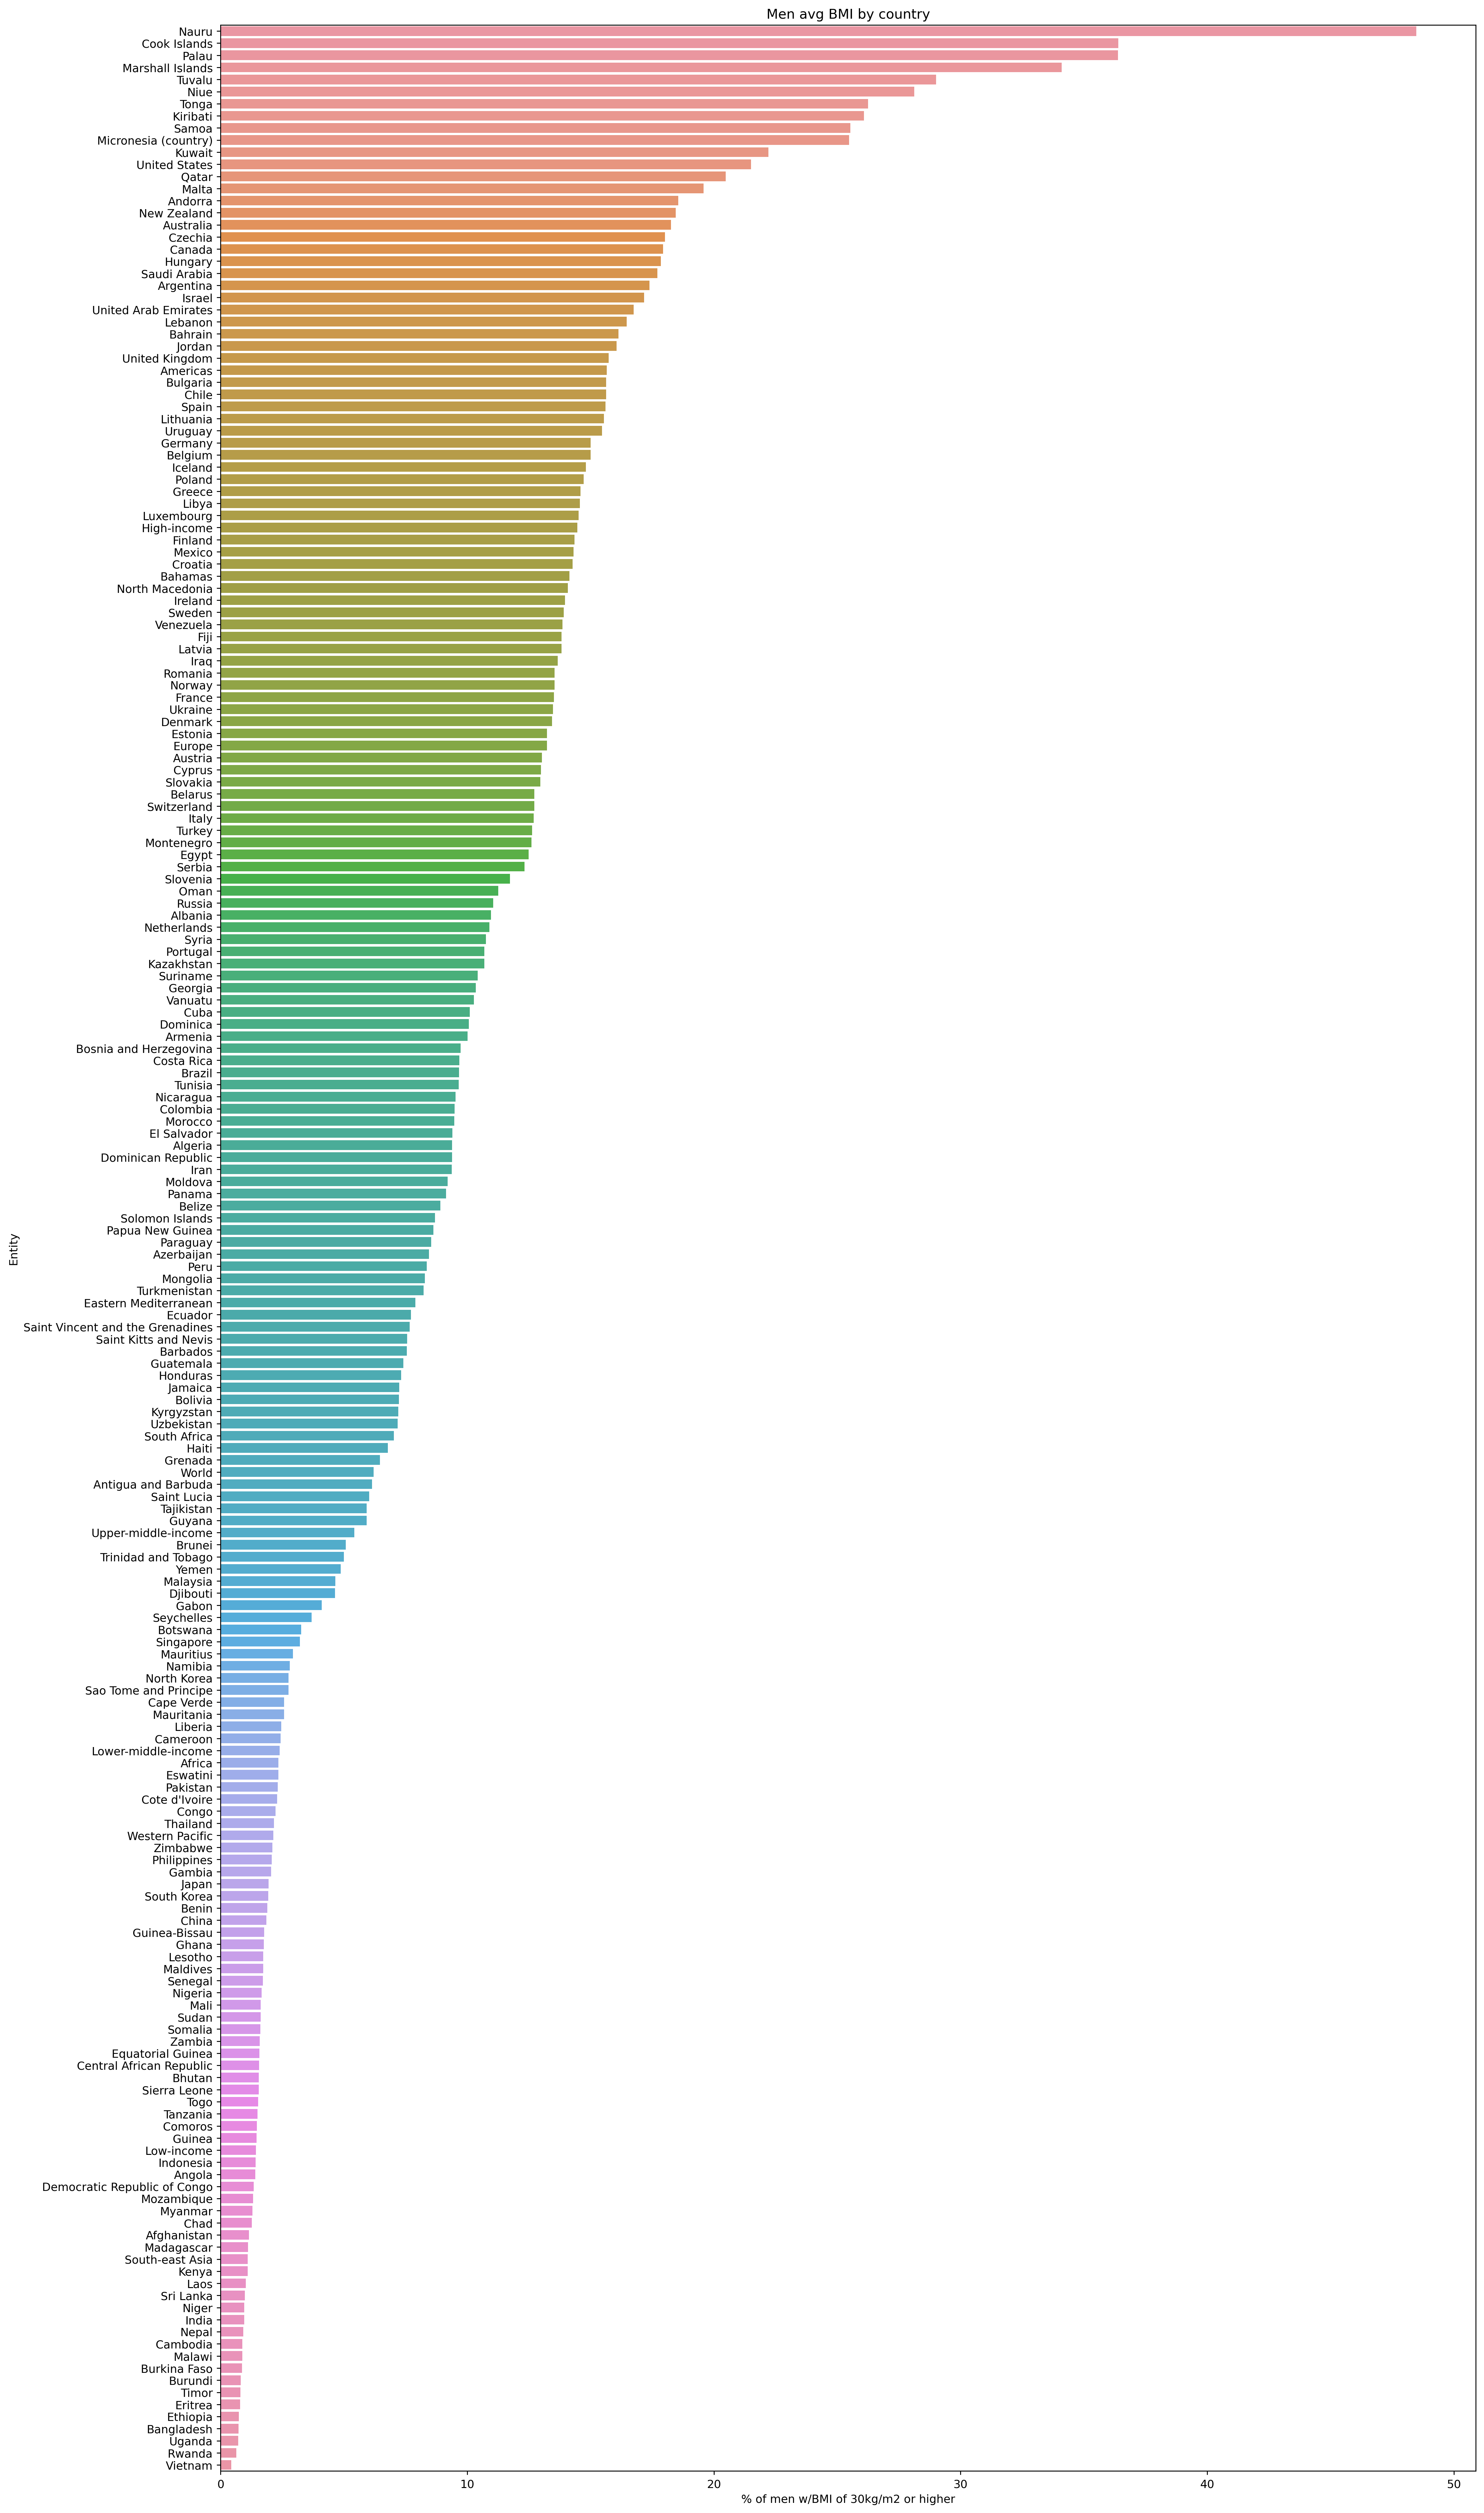

In [14]:
df=avg_men_by_country.sort_values('% of men w/BMI of 30kg/m2 or higher', ascending=False)
figure(num=None, figsize=(20,40),dpi=256, facecolor='w', edgecolor='r')
plt.title("Men avg BMI by country")
sns.barplot(data=df,x='% of men w/BMI of 30kg/m2 or higher', y='Entity')
plt.show()

In [15]:
m_vs_w_25.describe()

,Year,% of men w/BMI of 30kg/m2 or higher,% of women w/BMI of 30kg/m2 or higher
count,6356.000000,6262.000000,6262.000000
mean,2001.207048,10.683999,17.106068
std,9.038005,9.366403,11.444239
min,1986.000000,0.100000,0.400000
25%,1993.000000,2.600000,7.900000
50%,2001.000000,9.100000,16.100000
75%,2009.000000,16.000000,23.000000
max,2016.000000,58.700000,63.300000


In [16]:
m_vs_w_25['Entity'].unique()

array(['Abkhazia', 'Afghanistan', 'Africa', 'Akrotiri and Dhekelia',
       'Albania', 'Algeria', 'American Samoa', 'Americas', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Austria-Hungary', 'Azerbaijan', 'Baden', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Bavaria', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Territory', 'British Virgin Islands',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Christmas Island', 'Cocos Islands', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia'

In [17]:
Russia=men_vs_women.loc[(men_vs_women['Entity']=='Russia')]
Russia

,Entity,Code,Year,% of men w/BMI of 30kg/m2 or higher,% of women w/BMI of 30kg/m2 or higher,Continent
6276,Russia,RUS,1975,5.4,19.6,NaN
6277,Russia,RUS,1976,5.6,20.0,NaN
6278,Russia,RUS,1977,5.8,20.3,NaN
6279,Russia,RUS,1978,6.1,20.6,NaN
6280,Russia,RUS,1979,6.3,20.9,NaN
6281,Russia,RUS,1980,6.6,21.2,NaN
6282,Russia,RUS,1981,6.8,21.5,NaN
6283,Russia,RUS,1982,7.1,21.8,NaN
6284,Russia,RUS,1983,7.4,22.1,NaN
6285,Russia,RUS,1984,7.6,22.3,NaN


In [18]:
men_vs_women['Year'].unique()

array([2015, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2016], dtype=int64)

In [19]:
us_bmi = pd.read_csv('../data/NCD_RisC_Lancet_2017_BMI_age_standardised_United States of America2.csv')

In [20]:
us_bmi

,Country/Region/World,ISO,Sex,Year,Mean BMI,Mean BMI lower 95% uncertainty interval,Mean BMI upper 95% uncertainty interval,Prevalence of BMI>=30 kg/m² (obesity),Prevalence of BMI>=30 kg/m² lower 95% uncertainty interval,Prevalence of BMI>=30 kg/m² upper 95% uncertainty interval,Prevalence of BMI>=35 kg/m² (severe obesity),Prevalence of BMI>=35 kg/m² lower 95% uncertainty interval,Prevalence of BMI>=35 kg/m² upper 95% uncertainty interval,Prevalence of BMI<18.5 kg/m² (underweight),Prevalence of BMI<18.5 kg/m² lower 95% uncertainty interval,Prevalence of BMI<18.5 kg/m² upper 95% uncertainty interval,Prevalence of BMI 18.5 kg/m² to <20 kg/m²,Prevalence of BMI 18.5 kg/m² to <20 kg/m² lower 95% uncertainty interval,Prevalence of BMI 18.5 kg/m² to <20 kg/m² upper 95% uncertainty interval,Prevalence of BMI 20 kg/m² to <25 kg/m²,Prevalence of BMI 20 kg/m² to <25 kg/m² lower 95% uncertainty interval,Prevalence of BMI 20 kg/m² to <25 kg/m² upper 95% uncertainty interval,Prevalence of BMI 25 kg/m² to <30 kg/m²,Prevalence of BMI 25 kg/m² to <30 kg/m² lower 95% uncertainty interval,Prevalence of BMI 25 kg/m² to <30 kg/m² upper 95% uncertainty interval,Prevalence of BMI 30 kg/m² to <35 kg/m²,Prevalence of BMI 30 kg/m² to <35 kg/m² lower 95% uncertainty interval,Prevalence of BMI 30 kg/m² to <35 kg/m² upper 95% uncertainty interval,Prevalence of BMI 35 kg/m² to <40 kg/m²,Prevalence of BMI 35 kg/m² to <40 kg/m² lower 95% uncertainty interval,Prevalence of BMI 35 kg/m² to <40 kg/m² upper 95% uncertainty interval,Prevalence of BMI >=40 kg/m²(morbid obesity),Prevalence of BMI >=40 kg/m² lower 95% uncertainty interval,Prevalence of BMI >=40 kg/m² upper 95% uncertainty interval
0,United States of America,USA,Men,1975,25.289004,24.754709,25.823230,0.107136,0.072358,0.150464,0.013603,0.006766,0.024210,0.018831,0.009111,0.033374,0.046474,0.027686,0.072205,0.464803,0.392701,0.537410,0.362756,0.294801,0.432843,0.093534,0.058938,0.136324,0.011197,0.004812,0.021099,0.002406,0.000697,0.005818
1,United States of America,USA,Men,1976,25.347719,24.870465,25.826762,0.110666,0.076572,0.152707,0.014510,0.007532,0.024915,0.018022,0.009110,0.031180,0.044922,0.027520,0.068590,0.460247,0.392618,0.527992,0.366143,0.301920,0.432511,0.096156,0.062291,0.137501,0.011899,0.005394,0.021598,0.002611,0.000837,0.005952
2,United States of America,USA,Men,1977,25.405960,24.967831,25.852935,0.114265,0.080665,0.155416,0.015477,0.008351,0.025539,0.017260,0.009052,0.029059,0.043440,0.027301,0.065309,0.455623,0.391544,0.519677,0.369412,0.308651,0.431971,0.098787,0.065655,0.138618,0.012640,0.006051,0.022141,0.002838,0.001001,0.006157
3,United States of America,USA,Men,1978,25.465292,25.051328,25.885462,0.117944,0.085206,0.158103,0.016505,0.009233,0.026315,0.016540,0.008976,0.027326,0.042017,0.026985,0.062172,0.450930,0.390457,0.511157,0.372570,0.315007,0.431586,0.101438,0.068955,0.139924,0.013418,0.006701,0.022873,0.003088,0.001192,0.006381
4,United States of America,USA,Men,1979,25.527234,25.122793,25.936497,0.121725,0.089557,0.160840,0.017606,0.010180,0.027399,0.015860,0.008857,0.025623,0.040650,0.026559,0.059161,0.446147,0.388709,0.503027,0.375619,0.320665,0.432382,0.104119,0.072776,0.141683,0.014242,0.007336,0.023678,0.003364,0.001395,0.006721
5,United States of America,USA,Men,1980,25.592312,25.200749,25.997387,0.125626,0.093730,0.163981,0.018783,0.011216,0.028695,0.015218,0.008697,0.024087,0.039323,0.026048,0.056735,0.441270,0.386249,0.495071,0.378563,0.326149,0.433021,0.106843,0.075609,0.143901,0.015116,0.008056,0.024527,0.003667,0.001591,0.007125
6,United States of America,USA,Men,1981,25.662449,25.277014,26.053961,0.129725,0.098000,0.167734,0.020064,0.012319,0.030128,0.014609,0.008488,0.022914,0.038024,0.025507,0.054272,0.436221,0.383203,0.487182,0.381421,0.331314,0.433073,0.109661,0.078238,0.145854,0.016057,0.008788,0.025450,0.004007,0.001817,0.007597
7,United States of America,USA,Men,1982,25.737904,25.356135,26.130046,0.134047,0.102487,0.171053,0.021449,0.013584,0.03165

In [21]:
us_bmi_clean=us_bmi.drop(us_bmi.columns[[5,6,8,9,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33]],axis=1, inplace=True)
us_bmi_clean

In [22]:
us_bmi

,Country/Region/World,ISO,Sex,Year,Mean BMI,Prevalence of BMI>=30 kg/m² (obesity),Prevalence of BMI>=35 kg/m² (severe obesity),Prevalence of BMI<18.5 kg/m² (underweight),Prevalence of BMI >=40 kg/m²(morbid obesity)
0,United States of America,USA,Men,1975,25.289004,0.107136,0.013603,0.018831,0.002406
1,United States of America,USA,Men,1976,25.347719,0.110666,0.014510,0.018022,0.002611
2,United States of America,USA,Men,1977,25.405960,0.114265,0.015477,0.017260,0.002838
3,United States of America,USA,Men,1978,25.465292,0.117944,0.016505,0.016540,0.003088
4,United States of America,USA,Men,1979,25.527234,0.121725,0.017606,0.015860,0.003364
5,United States of America,USA,Men,1980,25.592312,0.125626,0.018783,0.015218,0.003667
6,United States of America,USA,Men,1981,25.662449,0.129725,0.020064,0.014609,0.004007
7,United States of America,USA,Men,1982,25.737904,0.134047,0.021449,0.014025,0.004383
8,United States of America,USA,Men,1983,25.818297,0.138571,0.022945,0.013471,0.004800
9,United States of America,USA,Men,1984,25.903410,0.143301,0.024562,0.012950,0.005261


In [23]:
us_bmi['% of pop.-obesity']=round(us_bmi['Prevalence of BMI>=30 kg/m² (obesity)']*100,2)

In [24]:
us_bmi['% of pop.-severe obesity']=round(us_bmi['Prevalence of BMI>=35 kg/m² (severe obesity)']*100,2)

In [25]:
us_bmi['% of pop.-underweight']=round(us_bmi['Prevalence of BMI<18.5 kg/m² (underweight)']*100,2)

In [26]:
us_bmi['% of pop.-morbid obesity']=round(us_bmi['Prevalence of BMI >=40 kg/m²(morbid obesity)']*100,2)

### U.S. BMI cleaned and ready

In [27]:
us_bmi

,Country/Region/World,ISO,Sex,Year,Mean BMI,Prevalence of BMI>=30 kg/m² (obesity),Prevalence of BMI>=35 kg/m² (severe obesity),Prevalence of BMI<18.5 kg/m² (underweight),Prevalence of BMI >=40 kg/m²(morbid obesity),% of pop.-obesity,% of pop.-severe obesity,% of pop.-underweight,% of pop.-morbid obesity
0,United States of America,USA,Men,1975,25.289004,0.107136,0.013603,0.018831,0.002406,10.71,1.36,1.88,0.24
1,United States of America,USA,Men,1976,25.347719,0.110666,0.014510,0.018022,0.002611,11.07,1.45,1.80,0.26
2,United States of America,USA,Men,1977,25.405960,0.114265,0.015477,0.017260,0.002838,11.43,1.55,1.73,0.28
3,United States of America,USA,Men,1978,25.465292,0.117944,0.016505,0.016540,0.003088,11.79,1.65,1.65,0.31
4,United States of America,USA,Men,1979,25.527234,0.121725,0.017606,0.015860,0.003364,12.17,1.76,1.59,0.34
5,United States of America,USA,Men,1980,25.592312,0.125626,0.018783,0.015218,0.003667,12.56,1.88,1.52,0.37
6,United States of America,USA,Men,1981,25.662449,0.129725,0.020064,0.014609,0.004007,12.97,2.01,1.46,0.40
7,United States of America,USA,Men,1982,25.737904,0.134047,0.021449,0.014025,0.004383,13.40,2.14,1.40,0.44
8,United States of America,USA,Men,1983,25.818297,0.138571,0.022945,0.013471,0.004800,13.86,2.29,1.35,0.48
9,United States of America,USA,Men,1984,25.903410,0.143301,0.024562,0.012950,0.005261,14.33,2.46,1.29,0.53


### US Men BMI

In [28]:
us_men_bmi=us_bmi[us_bmi['Sex']=='Men']
us_men_bmi

,Country/Region/World,ISO,Sex,Year,Mean BMI,Prevalence of BMI>=30 kg/m² (obesity),Prevalence of BMI>=35 kg/m² (severe obesity),Prevalence of BMI<18.5 kg/m² (underweight),Prevalence of BMI >=40 kg/m²(morbid obesity),% of pop.-obesity,% of pop.-severe obesity,% of pop.-underweight,% of pop.-morbid obesity
0,United States of America,USA,Men,1975,25.289004,0.107136,0.013603,0.018831,0.002406,10.71,1.36,1.88,0.24
1,United States of America,USA,Men,1976,25.347719,0.110666,0.014510,0.018022,0.002611,11.07,1.45,1.80,0.26
2,United States of America,USA,Men,1977,25.405960,0.114265,0.015477,0.017260,0.002838,11.43,1.55,1.73,0.28
3,United States of America,USA,Men,1978,25.465292,0.117944,0.016505,0.016540,0.003088,11.79,1.65,1.65,0.31
4,United States of America,USA,Men,1979,25.527234,0.121725,0.017606,0.015860,0.003364,12.17,1.76,1.59,0.34
5,United States of America,USA,Men,1980,25.592312,0.125626,0.018783,0.015218,0.003667,12.56,1.88,1.52,0.37
6,United States of America,USA,Men,1981,25.662449,0.129725,0.020064,0.014609,0.004007,12.97,2.01,1.46,0.40
7,United States of America,USA,Men,1982,25.737904,0.134047,0.021449,0.014025,0.004383,13.40,2.14,1.40,0.44
8,United States of America,USA,Men,1983,25.818297,0.138571,0.022945,0.013471,0.004800,13.86,2.29,1.35,0.48
9,United States of America,USA,Men,1984,25.903410,0.143301,0.024562,0.012950,0.005261,14.33,2.46,1.29,0.53


### US Women BMI

In [29]:
us_women_bmi=us_bmi[us_bmi['Sex']=='Women']
us_women_bmi

,Country/Region/World,ISO,Sex,Year,Mean BMI,Prevalence of BMI>=30 kg/m² (obesity),Prevalence of BMI>=35 kg/m² (severe obesity),Prevalence of BMI<18.5 kg/m² (underweight),Prevalence of BMI >=40 kg/m²(morbid obesity),% of pop.-obesity,% of pop.-severe obesity,% of pop.-underweight,% of pop.-morbid obesity
42,United States of America,USA,Women,1975,24.719590,0.138201,0.039229,0.044752,0.012628,13.82,3.92,4.48,1.26
43,United States of America,USA,Women,1976,24.793990,0.141961,0.041155,0.043439,0.013427,14.20,4.12,4.34,1.34
44,United States of America,USA,Women,1977,24.867150,0.145755,0.043151,0.042188,0.014268,14.58,4.32,4.22,1.43
45,United States of America,USA,Women,1978,24.940149,0.149608,0.045226,0.040992,0.015155,14.96,4.52,4.10,1.52
46,United States of America,USA,Women,1979,25.014333,0.153544,0.047385,0.039845,0.016093,15.35,4.74,3.98,1.61
47,United States of America,USA,Women,1980,25.091710,0.157591,0.049650,0.038739,0.017093,15.76,4.96,3.87,1.71
48,United States of America,USA,Women,1981,25.175194,0.161873,0.052079,0.037644,0.018179,16.19,5.21,3.76,1.82
49,United States of America,USA,Women,1982,25.265105,0.166380,0.054671,0.036562,0.019354,16.64,5.47,3.66,1.94
50,United States of America,USA,Women,1983,25.361073,0.171095,0.057428,0.035499,0.020616,17.11,5.74,3.55,2.06
51,United States of America,USA,Women,1984,25.462928,0.176018,0.060351,0.034457,0.021965,17.60,6.04,3.45,2.20


In [30]:
us_bmi.describe()

,Year,Mean BMI,Prevalence of BMI>=30 kg/m² (obesity),Prevalence of BMI>=35 kg/m² (severe obesity),Prevalence of BMI<18.5 kg/m² (underweight),Prevalence of BMI >=40 kg/m²(morbid obesity),% of pop.-obesity,% of pop.-severe obesity,% of pop.-underweight,% of pop.-morbid obesity
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,1995.500000,27.055120,0.236672,0.088666,0.018249,0.034998,23.666786,8.866667,1.824643,3.500238
std,12.193718,1.348442,0.079637,0.053498,0.010874,0.026876,7.963457,5.349676,1.087476,2.687374
min,1975.000000,24.719590,0.107136,0.013603,0.004912,0.002406,10.710000,1.360000,0.490000,0.240000
25%,1985.000000,25.812826,0.165875,0.044707,0.008725,0.013418,16.590000,4.470000,0.872500,1.340000
50%,1995.500000,27.068156,0.230593,0.079279,0.017197,0.028301,23.060000,7.930000,1.720000,2.830000
75%,2006.000000,28.340742,0.306642,0.128776,0.024350,0.051711,30.662500,12.875000,2.437500,5.170000
max,2016.000000,29.070706,0.381627,0.207616,0.044752,0.100732,38.160000,20.760000,4.480000,10.070000


In [31]:
global_bmi = pd.read_csv('../data/NCD_RisC_Lancet_2017_BMI_age_standardised_world2.csv')

In [32]:
global_bmi

,Country/Region/World,ISO,Sex,Year,Mean BMI,Mean BMI lower 95% uncertainty interval,Mean BMI upper 95% uncertainty interval,Prevalence of BMI>=30 kg/m² (obesity),Prevalence of BMI>=30 kg/m² lower 95% uncertainty interval,Prevalence of BMI>=30 kg/m² upper 95% uncertainty interval,Prevalence of BMI>=35 kg/m² (severe obesity),Prevalence of BMI>=35 kg/m² lower 95% uncertainty interval,Prevalence of BMI>=35 kg/m² upper 95% uncertainty interval,Prevalence of BMI<18.5 kg/m² (underweight),Prevalence of BMI<18.5 kg/m² lower 95% uncertainty interval,Prevalence of BMI<18.5 kg/m² upper 95% uncertainty interval,Prevalence of BMI 18.5 kg/m² to <20 kg/m²,Prevalence of BMI 18.5 kg/m² to <20 kg/m² lower 95% uncertainty interval,Prevalence of BMI 18.5 kg/m² to <20 kg/m² upper 95% uncertainty interval,Prevalence of BMI 20 kg/m² to <25 kg/m²,Prevalence of BMI 20 kg/m² to <25 kg/m² lower 95% uncertainty interval,Prevalence of BMI 20 kg/m² to <25 kg/m² upper 95% uncertainty interval,Prevalence of BMI 25 kg/m² to <30 kg/m²,Prevalence of BMI 25 kg/m² to <30 kg/m² lower 95% uncertainty interval,Prevalence of BMI 25 kg/m² to <30 kg/m² upper 95% uncertainty interval,Prevalence of BMI 30 kg/m² to <35 kg/m²,Prevalence of BMI 30 kg/m² to <35 kg/m² lower 95% uncertainty interval,Prevalence of BMI 30 kg/m² to <35 kg/m² upper 95% uncertainty interval,Prevalence of BMI 35 kg/m² to <40 kg/m²,Prevalence of BMI 35 kg/m² to <40 kg/m² lower 95% uncertainty interval,Prevalence of BMI 35 kg/m² to <40 kg/m² upper 95% uncertainty interval,Prevalence of BMI >=40 kg/m²(morbid obesity),Prevalence of BMI >=40 kg/m² lower 95% uncertainty interval,Prevalence of BMI >=40 kg/m² upper 95% uncertainty interval
0,World,NaN,Men,1975,21.655140,21.271800,22.041264,0.030488,0.023406,0.038916,0.002447,0.001513,0.003770,0.134001,0.105002,0.164508,0.160267,0.127172,0.195431,0.497705,0.454710,0.541049,0.177538,0.152072,0.205734,0.028041,0.021160,0.036384,0.002174,0.001272,0.003476,0.000273,0.000116,0.000565
1,World,NaN,Men,1976,21.722038,21.371320,22.078741,0.031527,0.024576,0.039674,0.002601,0.001652,0.003902,0.132914,0.105220,0.161854,0.158567,0.126983,0.192024,0.497234,0.456071,0.538598,0.179758,0.155298,0.207031,0.028926,0.022197,0.037038,0.002307,0.001393,0.003582,0.000294,0.000132,0.000580
2,World,NaN,Men,1977,21.789208,21.462569,22.116141,0.032596,0.025764,0.040628,0.002766,0.001797,0.004074,0.131844,0.105495,0.159524,0.156853,0.126980,0.188537,0.496709,0.457496,0.536097,0.181998,0.158458,0.208148,0.029830,0.023211,0.037707,0.002448,0.001518,0.003714,0.000317,0.000149,0.000597
3,World,NaN,Men,1978,21.856669,21.556821,22.154782,0.033695,0.027015,0.041522,0.002942,0.001965,0.004213,0.130788,0.105835,0.157251,0.155137,0.126824,0.185444,0.496134,0.458424,0.533800,0.184246,0.161362,0.209042,0.030753,0.024254,0.038381,0.002598,0.001662,0.003854,0.000344,0.000172,0.000621
4,World,NaN,Men,1979,21.924555,21.653523,22.196014,0.034829,0.028264,0.042306,0.003131,0.002141,0.004421,0.129744,0.106078,0.154919,0.153423,0.126609,0.181854,0.495499,0.459821,0.531491,0.186504,0.164501,0.210156,0.031699,0.025303,0.039045,0.002758,0.001818,0.003991,0.000373,0.000194,0.000649
5,World,NaN,Men,1980,21.993276,21.748995,22.240905,0.036013,0.029624,0.043272,0.003335,0.002341,0.004614,0.128688,0.106149,0.152340,0.151711,0.126129,0.178660,0.494802,0.461013,0.529042,0.188787,0.167680,0.211370,0.032678,0.026374,0.039790,0.002930,0.001971,0.004170,0.000405,0.000221,0.000683
6,World,NaN,Men,1981,22.063108,21.838002,22.294569,0.037247,0.031006,0.044203,0.003556,0.002544,0.004822,0.127609,0.106173,0.150113,0.149987,0.125685,0.175529,0.494034,0.461987,0.526498,0.191124,0.170701,0.212773,0.033691,0.027509,0.040575,0.003114,0.002135,0.004350,0.000442,0.000250,0.000726
7,World,NaN,Men,1982,22.133649,21.925808,22.342839,0.038532,0.032420,0.045403,0.003794,0.002762,0.005073,0.126515,0.106262,0.147849,0.148249,0.125311,0.172257,0.493205,0.462519,0.523924,0.193499,0.173762,0.214077,0.034738,0.028648,0.041433,0.003311,0.0023

In [33]:
global_bmi.drop(global_bmi.columns[[5,6,8,9,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33]],axis=1, inplace=True)
global_bmi

,Country/Region/World,ISO,Sex,Year,Mean BMI,Prevalence of BMI>=30 kg/m² (obesity),Prevalence of BMI>=35 kg/m² (severe obesity),Prevalence of BMI<18.5 kg/m² (underweight),Prevalence of BMI >=40 kg/m²(morbid obesity)
0,World,NaN,Men,1975,21.655140,0.030488,0.002447,0.134001,0.000273
1,World,NaN,Men,1976,21.722038,0.031527,0.002601,0.132914,0.000294
2,World,NaN,Men,1977,21.789208,0.032596,0.002766,0.131844,0.000317
3,World,NaN,Men,1978,21.856669,0.033695,0.002942,0.130788,0.000344
4,World,NaN,Men,1979,21.924555,0.034829,0.003131,0.129744,0.000373
5,World,NaN,Men,1980,21.993276,0.036013,0.003335,0.128688,0.000405
6,World,NaN,Men,1981,22.063108,0.037247,0.003556,0.127609,0.000442
7,World,NaN,Men,1982,22.133649,0.038532,0.003794,0.126515,0.000483
8,World,NaN,Men,1983,22.204357,0.039864,0.004049,0.125420,0.000529
9,World,NaN,Men,1984,22.274490,0.041239,0.004323,0.124340,0.000579


In [34]:
global_bmi['% worldwide obesity']=round(global_bmi['Prevalence of BMI>=30 kg/m² (obesity)']*100,2)

In [35]:
global_bmi['% worldwide severe obesity']=round(global_bmi['Prevalence of BMI>=35 kg/m² (severe obesity)']*100,2)

In [36]:
global_bmi['% worldwide underweight']=round(global_bmi['Prevalence of BMI<18.5 kg/m² (underweight)']*100,2)

In [37]:
global_bmi['% worldwide morbid obesity']=round(global_bmi['Prevalence of BMI >=40 kg/m²(morbid obesity)']*100,2)

In [38]:
global_bmi.drop('ISO', axis=1, inplace=True)

### Global BMI cleaned and ready.

In [39]:
global_bmi

,Country/Region/World,Sex,Year,Mean BMI,Prevalence of BMI>=30 kg/m² (obesity),Prevalence of BMI>=35 kg/m² (severe obesity),Prevalence of BMI<18.5 kg/m² (underweight),Prevalence of BMI >=40 kg/m²(morbid obesity),% worldwide obesity,% worldwide severe obesity,% worldwide underweight,% worldwide morbid obesity
0,World,Men,1975,21.655140,0.030488,0.002447,0.134001,0.000273,3.05,0.24,13.40,0.03
1,World,Men,1976,21.722038,0.031527,0.002601,0.132914,0.000294,3.15,0.26,13.29,0.03
2,World,Men,1977,21.789208,0.032596,0.002766,0.131844,0.000317,3.26,0.28,13.18,0.03
3,World,Men,1978,21.856669,0.033695,0.002942,0.130788,0.000344,3.37,0.29,13.08,0.03
4,World,Men,1979,21.924555,0.034829,0.003131,0.129744,0.000373,3.48,0.31,12.97,0.04
5,World,Men,1980,21.993276,0.036013,0.003335,0.128688,0.000405,3.60,0.33,12.87,0.04
6,World,Men,1981,22.063108,0.037247,0.003556,0.127609,0.000442,3.72,0.36,12.76,0.04
7,World,Men,1982,22.133649,0.038532,0.003794,0.126515,0.000483,3.85,0.38,12.65,0.05
8,World,Men,1983,22.204357,0.039864,0.004049,0.125420,0.000529,3.99,0.40,12.54,0.05
9,World,Men,1984,22.274490,0.041239,0.004323,0.124340,0.000579,4.12,0.43,12.43,0.06


### Global Men BMI

In [40]:
global_men_bmi=global_bmi[global_bmi['Sex']=='Men']
global_men_bmi

,Country/Region/World,Sex,Year,Mean BMI,Prevalence of BMI>=30 kg/m² (obesity),Prevalence of BMI>=35 kg/m² (severe obesity),Prevalence of BMI<18.5 kg/m² (underweight),Prevalence of BMI >=40 kg/m²(morbid obesity),% worldwide obesity,% worldwide severe obesity,% worldwide underweight,% worldwide morbid obesity
0,World,Men,1975,21.655140,0.030488,0.002447,0.134001,0.000273,3.05,0.24,13.40,0.03
1,World,Men,1976,21.722038,0.031527,0.002601,0.132914,0.000294,3.15,0.26,13.29,0.03
2,World,Men,1977,21.789208,0.032596,0.002766,0.131844,0.000317,3.26,0.28,13.18,0.03
3,World,Men,1978,21.856669,0.033695,0.002942,0.130788,0.000344,3.37,0.29,13.08,0.03
4,World,Men,1979,21.924555,0.034829,0.003131,0.129744,0.000373,3.48,0.31,12.97,0.04
5,World,Men,1980,21.993276,0.036013,0.003335,0.128688,0.000405,3.60,0.33,12.87,0.04
6,World,Men,1981,22.063108,0.037247,0.003556,0.127609,0.000442,3.72,0.36,12.76,0.04
7,World,Men,1982,22.133649,0.038532,0.003794,0.126515,0.000483,3.85,0.38,12.65,0.05
8,World,Men,1983,22.204357,0.039864,0.004049,0.125420,0.000529,3.99,0.40,12.54,0.05
9,World,Men,1984,22.274490,0.041239,0.004323,0.124340,0.000579,4.12,0.43,12.43,0.06


### Global Women BMI

In [41]:
global_women_bmi=global_bmi[global_bmi['Sex']=='Women']
global_women_bmi

,Country/Region/World,Sex,Year,Mean BMI,Prevalence of BMI>=30 kg/m² (obesity),Prevalence of BMI>=35 kg/m² (severe obesity),Prevalence of BMI<18.5 kg/m² (underweight),Prevalence of BMI >=40 kg/m²(morbid obesity),% worldwide obesity,% worldwide severe obesity,% worldwide underweight,% worldwide morbid obesity
42,World,Women,1975,22.077702,0.065633,0.013996,0.144660,0.002879,6.56,1.40,14.47,0.29
43,World,Women,1976,22.141962,0.067074,0.014509,0.143183,0.003021,6.71,1.45,14.32,0.30
44,World,Women,1977,22.206640,0.068544,0.015041,0.141699,0.003171,6.85,1.50,14.17,0.32
45,World,Women,1978,22.271179,0.070025,0.015588,0.140227,0.003330,7.00,1.56,14.02,0.33
46,World,Women,1979,22.335725,0.071517,0.016148,0.138768,0.003498,7.15,1.61,13.88,0.35
47,World,Women,1980,22.400873,0.073044,0.016731,0.137303,0.003674,7.30,1.67,13.73,0.37
48,World,Women,1981,22.467433,0.074615,0.017336,0.135807,0.003861,7.46,1.73,13.58,0.39
49,World,Women,1982,22.534832,0.076221,0.017962,0.134303,0.004058,7.62,1.80,13.43,0.41
50,World,Women,1983,22.602453,0.077844,0.018605,0.132819,0.004265,7.78,1.86,13.28,0.43
51,World,Women,1984,22.669499,0.079485,0.019266,0.131365,0.004481,7.95,1.93,13.14,0.45
